Skipping 690_015.png as both ground truth and prediction are empty.
Skipping 690_016.png as both ground truth and prediction are empty.
Evaluation of msem ink.
Overall Metrics for MSEM Ink:
IoU: 0.6713
Dice Coefficient: 0.7676
Precision: 0.8935
Recall: 0.7029
F1-Score: 0.7676
Evaluation of msem parchment.
Overall Metrics for MSEM Parchment:
IoU: 0.9764
Dice Coefficient: 0.9877
Precision: 0.9945
Recall: 0.9818
F1-Score: 0.9877
Evaluation of otsu with parchment_mask
Overall Metrics for Otsu:
IoU: 0.5642
Dice Coefficient: 0.6919
Precision: 0.5892
Recall: 0.9460
F1-Score: 0.6919
Evaluation of sauvola with parchment_mask
Overall Metrics for Sauvola:
IoU: 0.3104
Dice Coefficient: 0.4624
Precision: 0.3192
Recall: 0.9293
F1-Score: 0.4624
Evaluation of otsu_and_sauvola with parchment_mask
Overall Metrics for Otsu and Sauvola:
IoU: 0.5594
Dice Coefficient: 0.6888
Precision: 0.5924
Recall: 0.9277
F1-Score: 0.6888


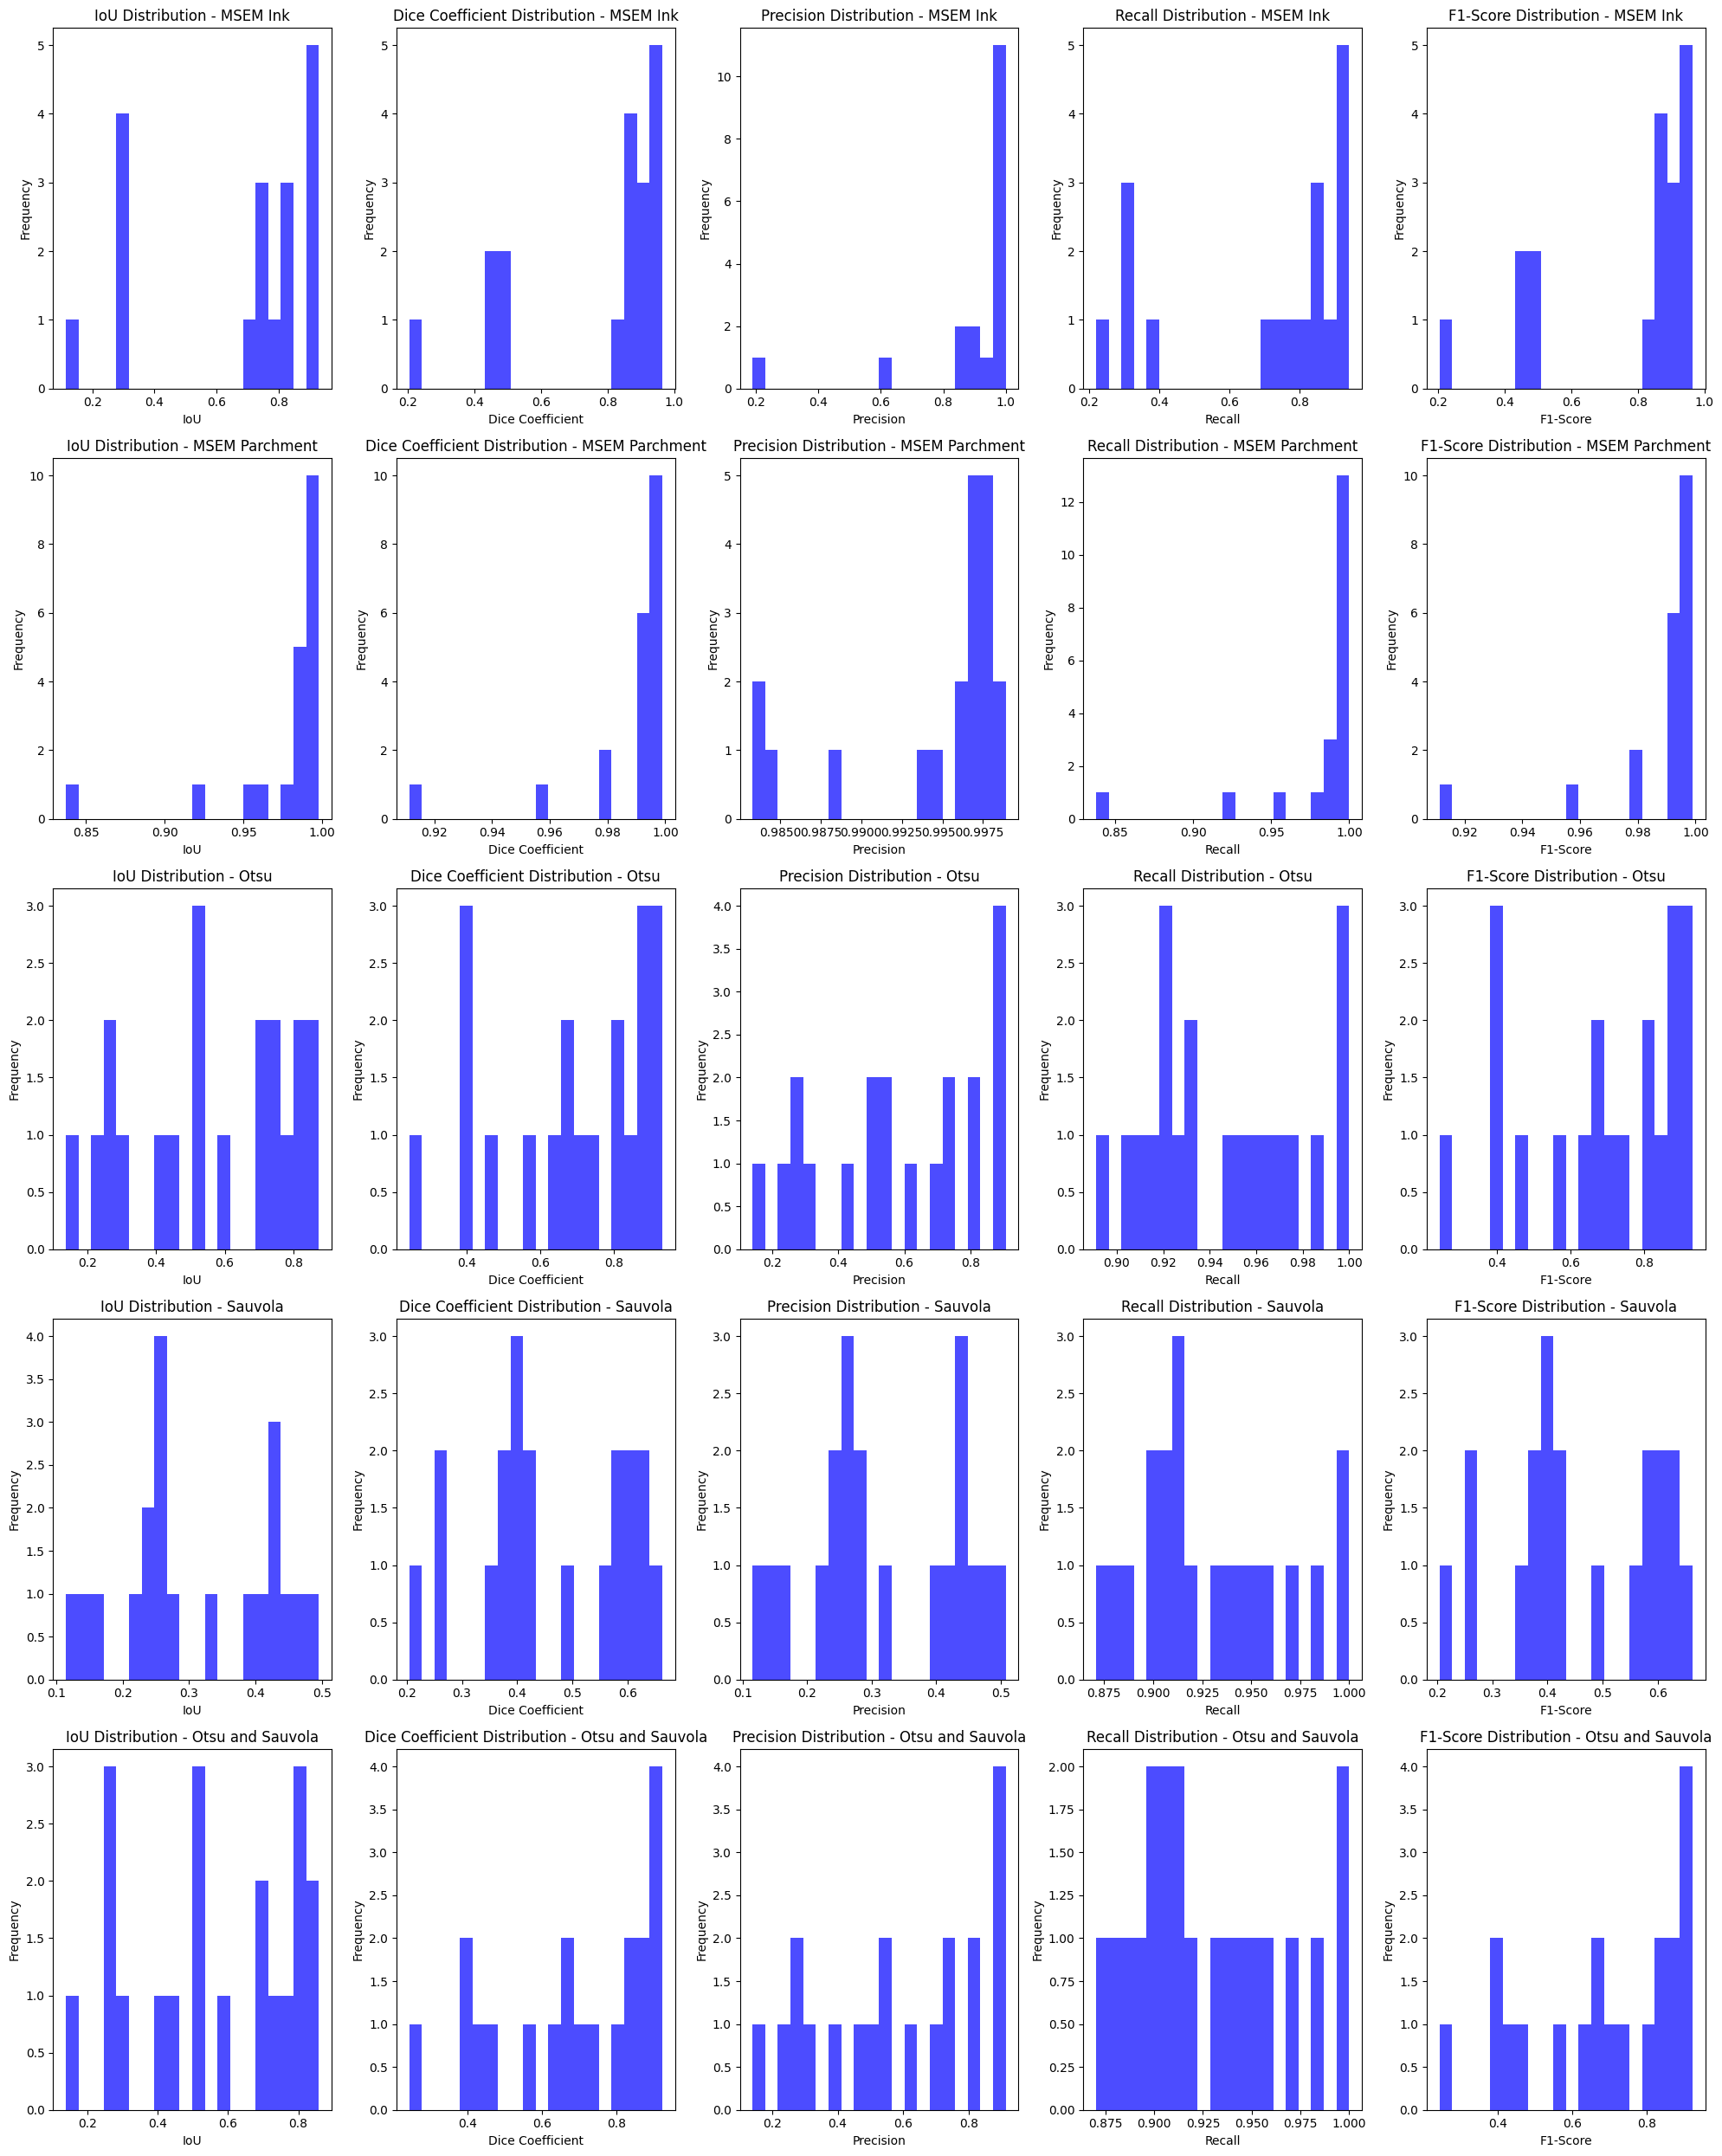

Evaluation completed.


In [40]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt


def evaluate_segmentation(ground_truth, prediction):

    # Flatten the masks to make computations easier
    ground_truth = ground_truth.flatten()
    prediction = prediction.flatten()

    # Calculate True Positives (TP), False Positives (FP), False Negatives (FN)
    TP = np.sum((ground_truth == 1) & (prediction == 1))
    FP = np.sum((ground_truth == 0) & (prediction == 1))
    FN = np.sum((ground_truth == 1) & (prediction == 0))
    TN = np.sum((ground_truth == 0) & (prediction == 0))

    # Intersection over Union (IoU)
    intersection = TP
    union = TP + FP + FN
    iou = intersection / union if union != 0 else 0

    # Dice Coefficient
    dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) != 0 else 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    return {
        "IoU": iou,
        "Dice Coefficient": dice,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

def load_images_from_folder(folder):

    images = {}
    for filename in os.listdir(folder):
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".bmp"):
            path = os.path.join(folder, filename)
            images[filename] = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return images

def evaluate_dataset(ground_truth_folder, prediction_folder):

    ground_truths = load_images_from_folder(ground_truth_folder)
    predictions = load_images_from_folder(prediction_folder)

    metrics = {
        "IoU": [],
        "Dice Coefficient": [],
        "Precision": [],
        "Recall": [],
        "F1-Score": []
    }

    for filename, ground_truth in ground_truths.items():
        if filename in predictions:
            prediction = predictions[filename]
            # Binarize the images if needed
            _, ground_truth = cv2.threshold(ground_truth, 127, 1, cv2.THRESH_BINARY)
            _, prediction = cv2.threshold(prediction, 127, 1, cv2.THRESH_BINARY)

            # Debugging Information
            if np.sum(ground_truth) == 0:
                print(f"Warning: Ground truth for {filename} is empty.")
            if np.sum(prediction) == 0:
                print(f"Warning: Prediction for {filename} is empty.")

            # Evaluate only if either ground truth or prediction has non-zero values
            if np.sum(ground_truth) > 0 or np.sum(prediction) > 0:
                result = evaluate_segmentation(ground_truth, prediction)
                for key in metrics:
                    metrics[key].append(result[key])
            else:
                print(f"Skipping {filename} as both ground truth and prediction are empty.")
        else:
            print(f"Warning: Prediction for {filename} not found.")

    return metrics

def plot_metrics(metrics_list, titles):
    fig, axes = plt.subplots(len(metrics_list), 5, figsize=(20, 5 * len(metrics_list)))

    metric_names = list(metrics_list[0].keys())
    for row_index, metrics in enumerate(metrics_list):
        for col_index, metric in enumerate(metric_names):
            axes[row_index, col_index].hist(metrics[metric], bins=20, color='blue', alpha=0.7)
            axes[row_index, col_index].set_title(f'{metric} Distribution - {titles[row_index]}')
            axes[row_index, col_index].set_xlabel(metric)
            axes[row_index, col_index].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

def print_overall_metrics(metrics, title):

    print(f"Overall Metrics for {title}:")
    for key, values in metrics.items():
        if len(values) > 0:
            mean_value = np.mean(values)
            print(f"{key}: {mean_value:.4f}")
        else:
            print(f"{key}: No valid data")


# Example usage:
ground_truth_folder_ink = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/ink_masks"
prediction_folder_ink = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/msem_results/ink_masks"

# Evaluate segmentation results for ink
metrics_ink = evaluate_dataset(ground_truth_folder_ink, prediction_folder_ink)
print("Evaluation of msem ink.")
print_overall_metrics(metrics_ink, "MSEM Ink")

ground_truth_folder_parchment = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/parchment_masks"
prediction_folder_parchment = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/msem_results/parchment_masks"

# Evaluate segmentation results for parchment
metrics_parchment = evaluate_dataset(ground_truth_folder_parchment, prediction_folder_parchment)
print("Evaluation of msem parchment.")
print_overall_metrics(metrics_parchment, "MSEM Parchment")


ground_truth_folder_otsu = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/parchment_masks"
prediction_folder_otsu = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/msem_results/otsu_masks"

# Evaluate segmentation results for otsu
metrics_otsu = evaluate_dataset(ground_truth_folder_otsu, prediction_folder_otsu)
print("Evaluation of otsu with parchment_mask")
print_overall_metrics(metrics_otsu, "Otsu")


ground_truth_folder_sauvola = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/parchment_masks"
prediction_folder_sauvola = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/msem_results/sauvola_masks"

# Evaluate segmentation results for sauvola
metrics_sauvola = evaluate_dataset(ground_truth_folder_sauvola, prediction_folder_sauvola)
print("Evaluation of sauvola with parchment_mask")
print_overall_metrics(metrics_sauvola, "Sauvola")


ground_truth_folder_otsu_and_sauvola = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/qumran_segmentation_dataset/parchment_masks"
prediction_folder_otsu_and_sauvola = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/msem_results/otsu_and_sauvola_masks"

# Evaluate segmentation results for otsu_and_sauvola
metrics_otsu_and_sauvola = evaluate_dataset(ground_truth_folder_otsu_and_sauvola, prediction_folder_otsu_and_sauvola)
print("Evaluation of otsu_and_sauvola with parchment_mask")
print_overall_metrics(metrics_otsu_and_sauvola, "Otsu and Sauvola")

plot_metrics([metrics_ink, metrics_parchment, metrics_otsu, metrics_sauvola, metrics_otsu_and_sauvola],
             ["MSEM Ink", "MSEM Parchment", "Otsu", "Sauvola", "Otsu and Sauvola"])
print("Evaluation completed.")

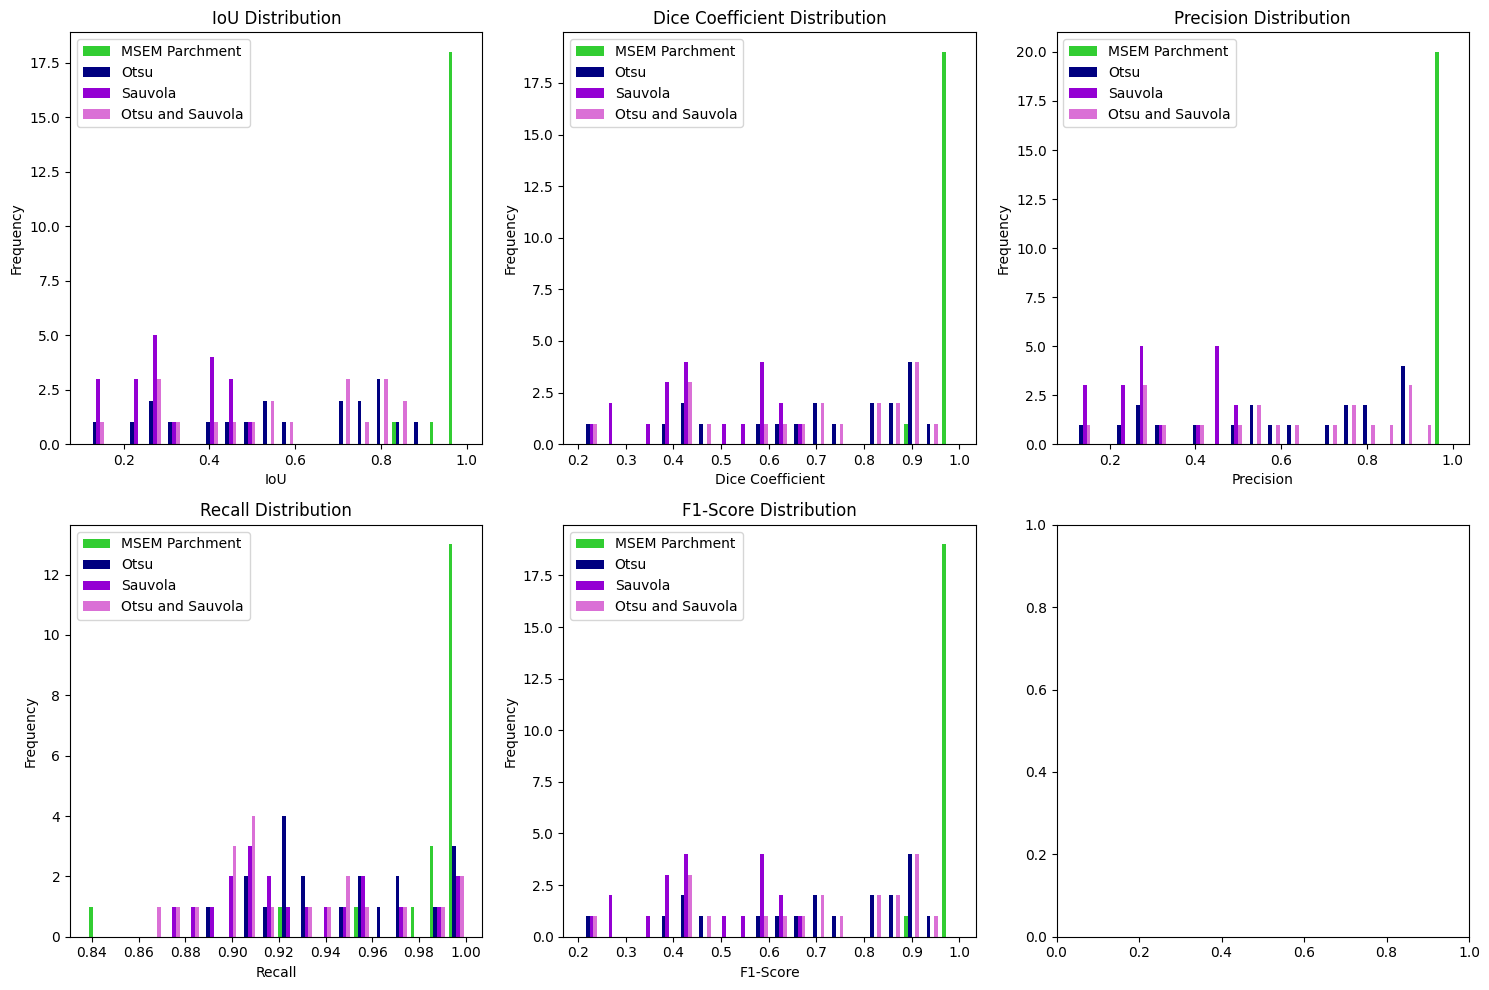

In [59]:

def plot_comparison(metrics_ink, metrics_parchment, metrics_otsu, metrics_sauvola, metrics_otsu_and_sauvola):
  """Plots a comparison of metrics for different segmentation methods."""

  metric_names = list(metrics_ink.keys())
  fig, axes = plt.subplots(2, 3, figsize=(15, 10))
  axes = axes.ravel()

  for i, metric in enumerate(metric_names):
      if i < len(axes):
          axes[i].hist([ metrics_parchment[metric], metrics_otsu[metric], metrics_sauvola[metric], metrics_otsu_and_sauvola[metric]],
                       bins=20, label=[ 'MSEM Parchment', 'Otsu', 'Sauvola', 'Otsu and Sauvola'],
                       color=['limegreen', 'navy', 'darkviolet', 'orchid'])
          axes[i].set_title(f'{metric} Distribution')
          axes[i].set_xlabel(metric)
          axes[i].set_ylabel('Frequency')
          axes[i].legend()

  plt.tight_layout()
  plt.show()
plot_comparison(metrics_ink, metrics_parchment, metrics_otsu, metrics_sauvola, metrics_otsu_and_sauvola)